# Analysis of Conflict Around The Continent

The Armed Conflict Location & Event Data Project aims to tracked armed conflict around the world by recording the groups attacking, where they occured and any other details about the conflict.


Purpose : To identify patterns in the way the militant groups attacked  and therefore give recommendations on what to expect and be better prepared incase they attack

Which are the top 5 most violent military groups in terms of fatalities and frequency of attacks.
How has thier activities varied in over the years
Where are thier activities concentrated?
What time did these attacks occur
Which months

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

C:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv("ACLED Africa 1997-2022.csv")
data

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
0,9713929,180,DRC27764,27764,31 December 2022,2022,1,Battles,Armed clash,M23: March 23 Movement,...,Kamatembe,-1.4011,28.5950,1,Mediacongo.net; Radio Okapi; RFI; Twitter,New media-National,"On 31 December 2022, during a two-day battle, ...",0,1673291085,COD
1,9713930,180,DRC27765,27765,31 December 2022,2022,1,Strategic developments,Other,East African Community Joint Regional Force to...,...,Kibumba,-1.4823,29.3460,1,7 Sur 7; Actualite; Election-Net; La Prunelle;...,New media-National,"Other: On 31 December 2022, the leadership of ...",0,1673291085,COD
2,9713931,180,DRC27766,27766,31 December 2022,2022,1,Violence against civilians,Abduction/forced disappearance,Twirwaneho Ethnic Militia (Democratic Republic...,...,Mikenge,-3.4497,28.4476,1,Kivu Times,Subnational,"On 31 December 2022, Twirwaneho abducted a wom...",0,1673291085,COD
3,9713933,180,DRC27768,27768,31 December 2022,2022,1,Battles,Armed clash,M23: March 23 Movement,...,Karenga,-1.4724,29.0655,2,Mediacongo.net; Radio Okapi,National,"On 31 December 2022, during a two-day battle, ...",0,1673291085,COD
4,9714388,231,ETH9524,9524,31 December 2022,2022,2,Violence against civilians,Attack,Police Forces of Ethiopia (2018-) Oromo Region...,...,Dupa,8.5807,35.5128,2,Oromiya Media Network,International,"Around 31 December 2022 (as reported), governm...",3,1673291087,ETH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305474,9695770,694,SIE2,2,01 January 1997,1997,3,Battles,Government regains territory,Military Forces of Sierra Leone (1996-1997),...,Mandu,8.4642,-10.9332,2,No Peace Without Justice; SL-LED,Local partner-New media,"Around 1 January 1997 (month of), Military For...",0,1670286851,SLE
305475,9695771,694,SIE3,3,01 January 1997,1997,3,Battles,Armed clash,Kamajor Militia,...,Selenga,8.1221,-11.7047,2,No Peace Without Justice; SL-LED,Local partner-New media,"Around 1 January 1997 (month of), Kamajor Mili...",0,1670286851,SLE
305476,9695772,694,SIE6,6,01 January 1997,1997,3,Violence against civilians,Attack,Military Forces of Sierra Leone (1996-1997),...,York Island,7.5317,-12.4694,2,No Peace Without Justice; SL-LED,Local partner-New media,"Around 1 January 1997 (month of), Military For...",0,1670286851,SLE
305477,9695773,694,SIE7,7,01 January 1997,1997,3,Battles,Armed clash,Kamajor Militia,...,Fakunya,8.2310,-12.3380,2,SL-LED; No Peace Without Justice,Local partner-New media,"Around 1 January 1997 (month of), Kamajor Mili...",0,1670286851,SLE


In [3]:
df = data.copy()

### Assesing the data

In [4]:
#Get dimensions
print(f"Dimensions : {data.shape}")
for col in df.columns:
    print(f" Column : {col :35} | type :{ str(df[col].dtype) } | Missing Values : {df[col].isna().sum():3} ")

Dimensions : (305479, 31)
 Column : data_id                             | type :int64 | Missing Values :   0 
 Column : iso                                 | type :int64 | Missing Values :   0 
 Column : event_id_cnty                       | type :object | Missing Values :   0 
 Column : event_id_no_cnty                    | type :int64 | Missing Values :   0 
 Column : event_date                          | type :object | Missing Values :   0 
 Column : year                                | type :int64 | Missing Values :   0 
 Column : time_precision                      | type :int64 | Missing Values :   0 
 Column : event_type                          | type :object | Missing Values :   0 
 Column : sub_event_type                      | type :object | Missing Values :   0 
 Column : actor1                              | type :object | Missing Values :   0 
 Column : assoc_actor_1                       | type :object | Missing Values : 225654 
 Column : inter1                         

**Observations**
Only 6 columns out of 31 has null values.We cant delete these because we will loose a significant amount of data.
Also they indicate that such data wasnt available or  there wasnt any extra party, which is also a valuable insight so we keep them

-Issues to solve
-Drop irrelevant columns
-Format the timestamp column
-Make the inter1 more descriptive by mapping appropriate values



In [5]:
#Drop irrelevant columns
df.drop(columns=["event_id_cnty","event_id_no_cnty","iso","iso3"],inplace=True)
df

,data_id,event_date,year,time_precision,event_type,sub_event_type,actor1,assoc_actor_1,inter1,actor2,...,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp
0,9713929,31 December 2022,2022,1,Battles,Armed clash,M23: March 23 Movement,NaN,2,Military Forces of the Democratic Republic of ...,...,Bahunde,Kamatembe,-1.4011,28.5950,1,Mediacongo.net; Radio Okapi; RFI; Twitter,New media-National,"On 31 December 2022, during a two-day battle, ...",0,1673291085
1,9713930,31 December 2022,2022,1,Strategic developments,Other,East African Community Joint Regional Force to...,ICGLR: International Conference on the Great L...,8,NaN,...,Bukumu,Kibumba,-1.4823,29.3460,1,7 Sur 7; Actualite; Election-Net; La Prunelle;...,New media-National,"Other: On 31 December 2022, the leadership of ...",0,1673291085
2,9713931,31 December 2022,2022,1,Violence against civilians,Abduction/forced disappearance,Twirwaneho Ethnic Militia (Democratic Republic...,Banyamulenge Ethnic Militia (Democratic Republ...,4,Civilians (Democratic Republic of Congo),...,Itombwe,Mikenge,-3.4497,28.4476,1,Kivu Times,Subnational,"On 31 December 2022, Twirwaneho abducted a wom...",0,1673291085
3,9713933,31 December 2022,2022,1,Battles,Armed clash,M23: March 23 Movement,NaN,2,Military Forces of the Democratic Republic of ...,...,Bahunde,Karenga,-1.4724,29.0655,2,Mediacongo.net; Radio Okapi,National,"On 31 December 2022, during a two-day battle, ...",0,1673291085
4,9714388,31 December 2022,2022,2,Violence against civilians,Attack,Police Forces of Ethiopia (2018-) Oromo Region...,NaN,1,Civilians (Ethiopia),...,Darimu,Dupa,8.5807,35.5128,2,Oromiya Media Network,International,"Around 31 December 2022 (as reported), governm...",3,1673291087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305474,9695770,01 January 1997,1997,3,Battles,Government regains territory,Military Forces of Sierra Leone (1996-1997),NaN,1,RUF: Revolutionary United Front,...,Gbane,Mandu,8.4642,-10.9332,2,No Peace Without Justice; SL-LED,Local partner-New media,"Around 1 January 1997 (month of), Military For...",0,1670286851
305475,9695771,01 January 1997,1997,3,Battles,Armed clash,Kamajor Militia,NaN,3,RUF: Revolutionary United Front,...,Selenga,Selenga,8.1221,-11.7047,2,No Peace Without Justice; SL-LED,Local partner-New media,"Around 1 January 1997 (month of), Kamajor Mili...",0,1670286851
305476,9695772,01 January 1997,1997,3,Violence against civilians,Attack,Military Forces of Sierra Leone (1996-1997),NaN,1,Civilians (Sierra Leone),...,Imperi,York Island,7.5317,-12.4694,2,No Peace Without Justice; SL-LED,Local partner-New media,"Around 1 January 1997 (month of), Military For...",0,1670286851
305477,9695773,01 January 1997,1997,3,Battles,Armed clash,Kamajor Militia,NaN,3,Military Forces of Sierra Leone (1996-1997),...,Fakunya,Fakunya,8.2310,-12.3380,2,SL-LED; No Peace Without Justice,Local partner-New media,"Around 1 January 1997 (month of), Kamajor Mili...",0,1670286851


In [6]:
## Mapping inter1 and inter2
inter_encodings = {0:"One-Sided",1 :"State Forces",2: "Rebel Groups", 3:"Political Militias", 4:"Identity Militias",5:"Rioters",6:"Protesters",7:"Civilians",8:"External/Other Forces"}
df["inter1"] = df["inter1"].apply(lambda x: inter_encodings[x])
df

,data_id,event_date,year,time_precision,event_type,sub_event_type,actor1,assoc_actor_1,inter1,actor2,...,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp
0,9713929,31 December 2022,2022,1,Battles,Armed clash,M23: March 23 Movement,NaN,Rebel Groups,Military Forces of the Democratic Republic of ...,...,Bahunde,Kamatembe,-1.4011,28.5950,1,Mediacongo.net; Radio Okapi; RFI; Twitter,New media-National,"On 31 December 2022, during a two-day battle, ...",0,1673291085
1,9713930,31 December 2022,2022,1,Strategic developments,Other,East African Community Joint Regional Force to...,ICGLR: International Conference on the Great L...,External/Other Forces,NaN,...,Bukumu,Kibumba,-1.4823,29.3460,1,7 Sur 7; Actualite; Election-Net; La Prunelle;...,New media-National,"Other: On 31 December 2022, the leadership of ...",0,1673291085
2,9713931,31 December 2022,2022,1,Violence against civilians,Abduction/forced disappearance,Twirwaneho Ethnic Militia (Democratic Republic...,Banyamulenge Ethnic Militia (Democratic Republ...,Identity Militias,Civilians (Democratic Republic of Congo),...,Itombwe,Mikenge,-3.4497,28.4476,1,Kivu Times,Subnational,"On 31 December 2022, Twirwaneho abducted a wom...",0,1673291085
3,9713933,31 December 2022,2022,1,Battles,Armed clash,M23: March 23 Movement,NaN,Rebel Groups,Military Forces of the Democratic Republic of ...,...,Bahunde,Karenga,-1.4724,29.0655,2,Mediacongo.net; Radio Okapi,National,"On 31 December 2022, during a two-day battle, ...",0,1673291085
4,9714388,31 December 2022,2022,2,Violence against civilians,Attack,Police Forces of Ethiopia (2018-) Oromo Region...,NaN,State Forces,Civilians (Ethiopia),...,Darimu,Dupa,8.5807,35.5128,2,Oromiya Media Network,International,"Around 31 December 2022 (as reported), governm...",3,1673291087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305474,9695770,01 January 1997,1997,3,Battles,Government regains territory,Military Forces of Sierra Leone (1996-1997),NaN,State Forces,RUF: Revolutionary United Front,...,Gbane,Mandu,8.4642,-10.9332,2,No Peace Without Justice; SL-LED,Local partner-New media,"Around 1 January 1997 (month of), Military For...",0,1670286851
305475,9695771,01 January 1997,1997,3,Battles,Armed clash,Kamajor Militia,NaN,Political Militias,RUF: Revolutionary United Front,...,Selenga,Selenga,8.1221,-11.7047,2,No Peace Without Justice; SL-LED,Local partner-New media,"Around 1 January 1997 (month of), Kamajor Mili...",0,1670286851
305476,9695772,01 January 1997,1997,3,Violence against civilians,Attack,Military Forces of Sierra Leone (1996-1997),NaN,State Forces,Civilians (Sierra Leone),...,Imperi,York Island,7.5317,-12.4694,2,No Peace Without Justice; SL-LED,Local partner-New media,"Around 1 January 1997 (month of), Military For...",0,1670286851
305477,9695773,01 January 1997,1997,3,Battles,Armed clash,Kamajor Militia,NaN,Political Militias,Military Forces of Sierra Leone (1996-1997),...,Fakunya,Fakunya,8.2310,-12.3380,2,SL-LED; No Peace Without Justice,Local partner-New media,"Around 1 January 1997 (month of), Kamajor Mili...",0,1670286851


In [7]:
df["inter2"] = df["inter2"].apply(lambda x: inter_encodings[x])

In [8]:
df

,data_id,event_date,year,time_precision,event_type,sub_event_type,actor1,assoc_actor_1,inter1,actor2,...,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp
0,9713929,31 December 2022,2022,1,Battles,Armed clash,M23: March 23 Movement,NaN,Rebel Groups,Military Forces of the Democratic Republic of ...,...,Bahunde,Kamatembe,-1.4011,28.5950,1,Mediacongo.net; Radio Okapi; RFI; Twitter,New media-National,"On 31 December 2022, during a two-day battle, ...",0,1673291085
1,9713930,31 December 2022,2022,1,Strategic developments,Other,East African Community Joint Regional Force to...,ICGLR: International Conference on the Great L...,External/Other Forces,NaN,...,Bukumu,Kibumba,-1.4823,29.3460,1,7 Sur 7; Actualite; Election-Net; La Prunelle;...,New media-National,"Other: On 31 December 2022, the leadership of ...",0,1673291085
2,9713931,31 December 2022,2022,1,Violence against civilians,Abduction/forced disappearance,Twirwaneho Ethnic Militia (Democratic Republic...,Banyamulenge Ethnic Militia (Democratic Republ...,Identity Militias,Civilians (Democratic Republic of Congo),...,Itombwe,Mikenge,-3.4497,28.4476,1,Kivu Times,Subnational,"On 31 December 2022, Twirwaneho abducted a wom...",0,1673291085
3,9713933,31 December 2022,2022,1,Battles,Armed clash,M23: March 23 Movement,NaN,Rebel Groups,Military Forces of the Democratic Republic of ...,...,Bahunde,Karenga,-1.4724,29.0655,2,Mediacongo.net; Radio Okapi,National,"On 31 December 2022, during a two-day battle, ...",0,1673291085
4,9714388,31 December 2022,2022,2,Violence against civilians,Attack,Police Forces of Ethiopia (2018-) Oromo Region...,NaN,State Forces,Civilians (Ethiopia),...,Darimu,Dupa,8.5807,35.5128,2,Oromiya Media Network,International,"Around 31 December 2022 (as reported), governm...",3,1673291087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305474,9695770,01 January 1997,1997,3,Battles,Government regains territory,Military Forces of Sierra Leone (1996-1997),NaN,State Forces,RUF: Revolutionary United Front,...,Gbane,Mandu,8.4642,-10.9332,2,No Peace Without Justice; SL-LED,Local partner-New media,"Around 1 January 1997 (month of), Military For...",0,1670286851
305475,9695771,01 January 1997,1997,3,Battles,Armed clash,Kamajor Militia,NaN,Political Militias,RUF: Revolutionary United Front,...,Selenga,Selenga,8.1221,-11.7047,2,No Peace Without Justice; SL-LED,Local partner-New media,"Around 1 January 1997 (month of), Kamajor Mili...",0,1670286851
305476,9695772,01 January 1997,1997,3,Violence against civilians,Attack,Military Forces of Sierra Leone (1996-1997),NaN,State Forces,Civilians (Sierra Leone),...,Imperi,York Island,7.5317,-12.4694,2,No Peace Without Justice; SL-LED,Local partner-New media,"Around 1 January 1997 (month of), Military For...",0,1670286851
305477,9695773,01 January 1997,1997,3,Battles,Armed clash,Kamajor Militia,NaN,Political Militias,Military Forces of Sierra Leone (1996-1997),...,Fakunya,Fakunya,8.2310,-12.3380,2,SL-LED; No Peace Without Justice,Local partner-New media,"Around 1 January 1997 (month of), Kamajor Mili...",0,1670286851


In [9]:
#! Warning dont convert the timestamps, its giving the wrong dates
#Convert timestamp column to appropriate dtype
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
df

,data_id,event_date,year,time_precision,event_type,sub_event_type,actor1,assoc_actor_1,inter1,actor2,...,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp
0,9713929,31 December 2022,2022,1,Battles,Armed clash,M23: March 23 Movement,NaN,Rebel Groups,Military Forces of the Democratic Republic of ...,...,Bahunde,Kamatembe,-1.4011,28.5950,1,Mediacongo.net; Radio Okapi; RFI; Twitter,New media-National,"On 31 December 2022, during a two-day battle, ...",0,2023-01-09 19:04:45
1,9713930,31 December 2022,2022,1,Strategic developments,Other,East African Community Joint Regional Force to...,ICGLR: International Conference on the Great L...,External/Other Forces,NaN,...,Bukumu,Kibumba,-1.4823,29.3460,1,7 Sur 7; Actualite; Election-Net; La Prunelle;...,New media-National,"Other: On 31 December 2022, the leadership of ...",0,2023-01-09 19:04:45
2,9713931,31 December 2022,2022,1,Violence against civilians,Abduction/forced disappearance,Twirwaneho Ethnic Militia (Democratic Republic...,Banyamulenge Ethnic Militia (Democratic Republ...,Identity Militias,Civilians (Democratic Republic of Congo),...,Itombwe,Mikenge,-3.4497,28.4476,1,Kivu Times,Subnational,"On 31 December 2022, Twirwaneho abducted a wom...",0,2023-01-09 19:04:45
3,9713933,31 December 2022,2022,1,Battles,Armed clash,M23: March 23 Movement,NaN,Rebel Groups,Military Forces of the Democratic Republic of ...,...,Bahunde,Karenga,-1.4724,29.0655,2,Mediacongo.net; Radio Okapi,National,"On 31 December 2022, during a two-day battle, ...",0,2023-01-09 19:04:45
4,9714388,31 December 2022,2022,2,Violence against civilians,Attack,Police Forces of Ethiopia (2018-) Oromo Region...,NaN,State Forces,Civilians (Ethiopia),...,Darimu,Dupa,8.5807,35.5128,2,Oromiya Media Network,International,"Around 31 December 2022 (as reported), governm...",3,2023-01-09 19:04:47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305474,9695770,01 January 1997,1997,3,Battles,Government regains territory,Military Forces of Sierra Leone (1996-1997),NaN,State Forces,RUF: Revolutionary United Front,...,Gbane,Mandu,8.4642,-10.9332,2,No Peace Without Justice; SL-LED,Local partner-New media,"Around 1 January 1997 (month of), Military For...",0,2022-12-06 00:34:11
305475,9695771,01 January 1997,1997,3,Battles,Armed clash,Kamajor Militia,NaN,Political Militias,RUF: Revolutionary United Front,...,Selenga,Selenga,8.1221,-11.7047,2,No Peace Without Justice; SL-LED,Local partner-New media,"Around 1 January 1997 (month of), Kamajor Mili...",0,2022-12-06 00:34:11
305476,9695772,01 January 1997,1997,3,Violence against civilians,Attack,Military Forces of Sierra Leone (1996-1997),NaN,State Forces,Civilians (Sierra Leone),...,Imperi,York Island,7.5317,-12.4694,2,No Peace Without Justice; SL-LED,Local partner-New media,"Around 1 January 1997 (month of), Military For...",0,2022-12-06 00:34:11
305477,9695773,01 January 1997,1997,3,Battles,Armed clash,Kamajor Militia,NaN,Political Militias,Military Forces of Sierra Leone (1996-1997),...,Fakunya,Fakunya,8.2310,-12.3380,2,SL-LED; No Peace Without Justice,Local partner-New media,"Around 1 January 1997 (month of), Kamajor Mili...",0,2022-12-06 00:34:11


# Univariate Analysis

### Which year had the most  fights

In [10]:
y1 = df["year"].value_counts(sort="False")
y1 = y1.sort_index()
y1

1997     3209
1998     4546
1999     4882
2000     4175
2001     3610
2002     4297
2003     3750
2004     3174
2005     2909
2006     2739
2007     3897
2008     5084
2009     3868
2010     4402
2011     8145
2012     9790
2013    14234
2014    16589
2015    16996
2016    17317
2017    17657
2018    19718
2019    25896
2020    33310
2021    34937
2022    36348
Name: year, dtype: int64

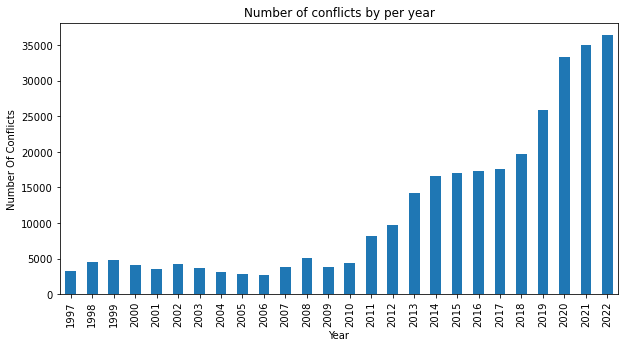

In [11]:
plt.figure(figsize=(10,5))
y1.plot(kind="bar")
plt.title("Number of conflicts by per year")
plt.xlabel("Year")
plt.ylabel("Number Of Conflicts");


In [12]:
df["month"] = df["event_date"].str.split(" ",expand=True)[1]
df[["month","event_date"]]

,month,event_date
0,December,31 December 2022
1,December,31 December 2022
2,December,31 December 2022
3,December,31 December 2022
4,December,31 December 2022
...,...,...
305474,January,01 January 1997
305475,January,01 January 1997
305476,January,01 January 1997
305477,January,01 January 1997


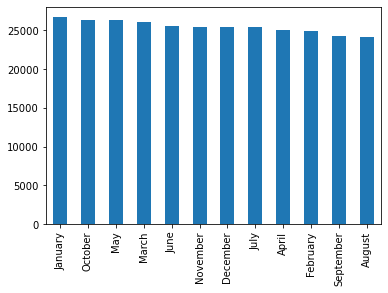

In [13]:
m1 = df["month"].value_counts().plot(kind="bar")

### Which are the top militant groups

In [14]:
g1 = df["actor1"].value_counts()
g1

Al Shabaab                                              11070
Protesters (South Africa)                                9097
Protesters (Algeria)                                     7897
Unidentified Armed Group (Somalia)                       7250
Protesters (Tunisia)                                     7004
                                                        ...  
Mbalom Communal Militia (Nigeria)                           1
Kete Communal Militia (Democratic Republic of Congo)        1
Botro Communal Militia (Ivory Coast)                        1
Lendikinya Communal Militia (Tanzania)                      1
Zwelisha Communal Militia (South Africa)                    1
Name: actor1, Length: 5324, dtype: int64

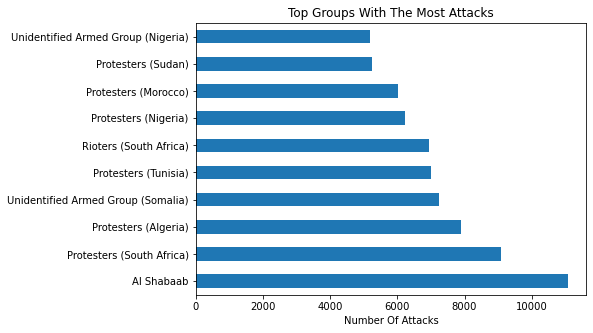

In [15]:
g1.head(10).plot(kind="barh",figsize=(7,5))
plt.title("Top Groups With The Most Attacks")
plt.xlabel("Number Of Attacks");

In [16]:
g2 = df["actor2"].value_counts().head(10)
g2

Civilians (Nigeria)                         11475
Civilians (Democratic Republic of Congo)    10603
Civilians (Somalia)                         10147
Al Shabaab                                   8281
Civilians (Sudan)                            7345
Civilians (Burundi)                          6424
Civilians (Zimbabwe)                         4748
Civilians (South Sudan)                      3823
Civilians (Cameroon)                         3606
Civilians (Burkina Faso)                     3598
Name: actor2, dtype: int64

In [17]:
# import folium
#
# m =folium.Map(location=[data['latitude'].mean(), data['longitude'].mean()], zoom_start=10)
# for index, row in data.iterrows():
#     folium.Marker([row['latitude'], row['longitude']]).add_to(m)
# m

In [18]:
df["event_type"].unique()

array(['Battles', 'Strategic developments', 'Violence against civilians',
       'Riots', 'Protests', 'Explosions/Remote violence'], dtype=object)

In [19]:
ct = pd.crosstab(df["event_type"],df["region"])
ct

region,Eastern Africa,Middle Africa,Northern Africa,Southern Africa,Western Africa
event_type,,,,,
Battles,33911,17531,11703,387,15112
Explosions/Remote violence,9722,958,8024,104,3926
Protests,10608,4629,31764,11904,13259
Riots,7836,3249,5929,8823,7411
Strategic developments,6349,5314,2910,637,7517
Violence against civilians,26168,15507,9376,6076,18835


<Figure size 1296x1080 with 0 Axes>

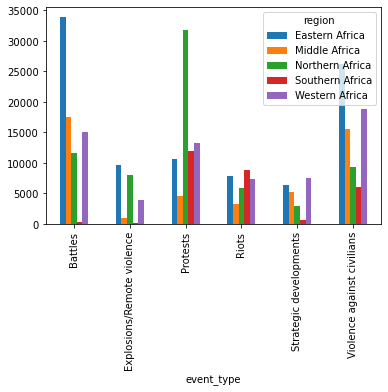

In [20]:
plt.figure(figsize=(18,15))
ct.plot(kind="bar");

<AxesSubplot:xlabel='region', ylabel='event_type'>

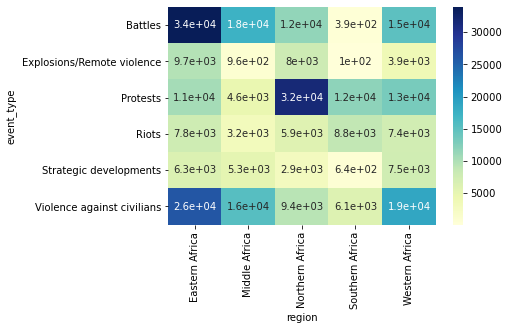

In [21]:
sb.heatmap(ct, annot=True, cmap='YlGnBu')

## Seasonal Patterns Of Conflicts

1. Are there any seasonal trends or patterns in the overall frequency of conflict events over time?
2. Are there any differences in the seasonal patterns of conflict events between different regions or countries?
3. Are there any differences in the types of conflict events that occur during different seasons ?
4.

#### Are there any seasonal trends or patterns in the overall frequency of conflict events over time?

Summer : December , January , February
Autumn : March , April , May
Winter  : June , July , August
Spring  : September , October , November

In [22]:
##Create a function to map months into appropriate seasons
def get_season(month) :
    if month in ["December" , "January" , "February"] :
        return "summer"
    if month in ["March" , "April" , "May"] :
        return "autumn"
    if month in ["June" , "July" , "August"] :
        return  "winter"
    if month in ["September" , "October" , "November"] :
        return "spring"

In [40]:
months = [ "January" , "February", "March" , "April" , "May","June" , "July" , "August","September" , "October" , "November","December"  ]

In [23]:
df["season"] = df['month'].apply(lambda x :get_season(x))
df["season"]

0         summer
1         summer
2         summer
3         summer
4         summer
           ...  
305474    summer
305475    summer
305476    summer
305477    summer
305478    summer
Name: season, Length: 305479, dtype: object

In [24]:
print(df["event_date"].dtype)

object


In [25]:
#Convert the event date column into a datetime format
df["event_date"] = pd.to_datetime(df["event_date"])
print(df["event_date"].dtype)

datetime64[ns]


In [26]:
monthly = df.groupby(pd.Grouper(key="event_date",freq="M"))["data_id"].count()
monthly

event_date
1997-01-31     241
1997-02-28     143
1997-03-31     244
1997-04-30     202
1997-05-31     349
              ... 
2022-08-31    3036
2022-09-30    2865
2022-10-31    3183
2022-11-30    3106
2022-12-31    2839
Freq: M, Name: data_id, Length: 312, dtype: int64

In [27]:
year = df.groupby(pd.Grouper(key="event_date",freq="Y"))["data_id"].count()
seasonal = df.groupby(pd.Grouper(key="event_date",freq="Q"))["data_id"].count()
year

event_date
1997-12-31     3209
1998-12-31     4546
1999-12-31     4882
2000-12-31     4175
2001-12-31     3610
2002-12-31     4297
2003-12-31     3750
2004-12-31     3174
2005-12-31     2909
2006-12-31     2739
2007-12-31     3897
2008-12-31     5084
2009-12-31     3868
2010-12-31     4402
2011-12-31     8145
2012-12-31     9790
2013-12-31    14234
2014-12-31    16589
2015-12-31    16996
2016-12-31    17317
2017-12-31    17657
2018-12-31    19718
2019-12-31    25896
2020-12-31    33310
2021-12-31    34937
2022-12-31    36348
Freq: A-DEC, Name: data_id, dtype: int64

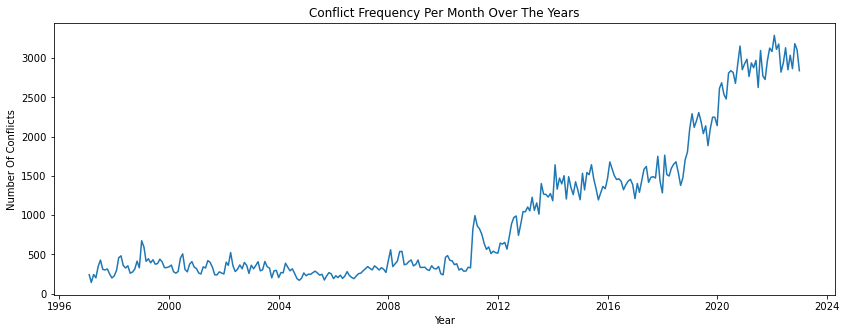

In [28]:
# Plot the time series
plt.figure(figsize=(14,5))
plt.title("Conflict Frequency Per Month Over The Years")
plt.xlabel("Year")
plt.ylabel("Number Of Conflicts")
plt.plot(monthly);

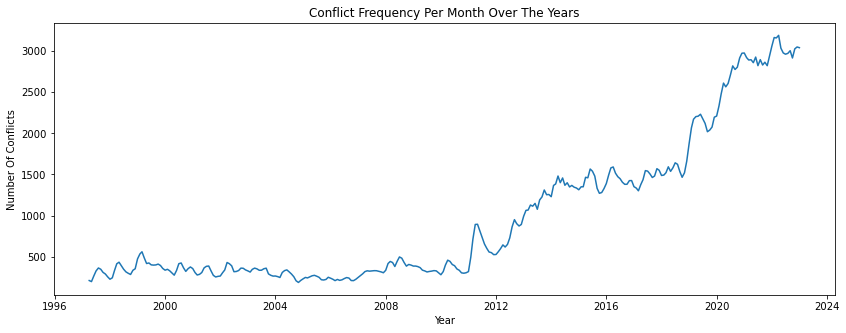

In [29]:
#Smooth out the curve using rolling average
plt.figure(figsize=(14,5))
plt.title("Conflict Frequency Per Month Over The Years")
plt.xlabel("Year")
plt.ylabel("Number Of Conflicts")
monthly_rolling = monthly.rolling(3).mean()
plt.plot(monthly_rolling);

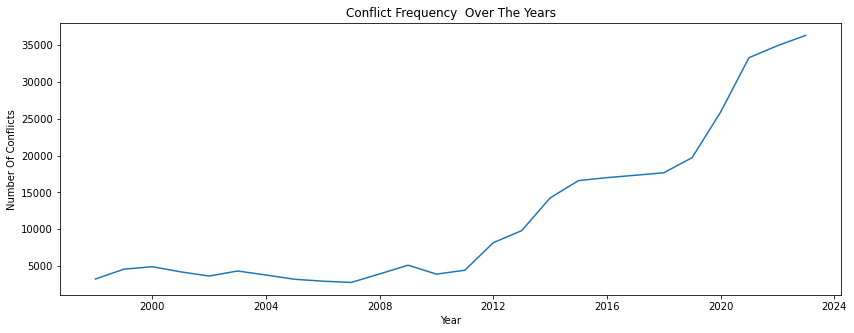

In [30]:
plt.figure(figsize=(14,5))
plt.title("Conflict Frequency  Over The Years")
plt.xlabel("Year")
plt.ylabel("Number Of Conflicts")
plt.plot(year);

In [31]:
plt.figure(figsize=(14,5))
sb.barplot(data=df,x="season");


TypeError: Horizontal orientation requires numeric `x` variable.

<Figure size 1008x360 with 0 Axes>

In [ ]:
# Perform a seasonal decomposition of the monthly conflict events using STL
import statsmodels.api as sm


stl = sm.tsa.seasonal_decompose(monthly, model='additive', freq=12)
plt.figure(figsize=(20, 20))
stl.plot()
plt.show()

# Calculate the autocorrelation function of the monthly conflict events
# acf = sm.graphics.tsa.plot_acf(monthly, lags=24)
# acf.show()

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(stl.seasonal)
plt.title('Trend of Conflicts per Month')
plt.xlabel('Date')
plt.ylabel('Number of Conflicts')
plt.show();

In [ ]:
fig , (ax1,ax2) = plt.subplots(2,1,figsize=(15, 8))
ax1.plot(stl.trend)
ax1.set_title('Trend of Conflicts per Month')
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Conflicts')

# Plot the seasonal component on the second subplot
ax2.plot(stl.seasonal)
ax2.set_title('Seasonal Component of Conflicts per Month')
ax2.set_xlabel('Date')
ax2.set_ylabel('Number of Conflicts')

plt.tight_layout()
plt.show()

In [75]:
#Calculate the total number of conflicts each month for the 45 years
cm = df["month"].value_counts(sort=False)
cm =cm.reindex(index=months)
cm

January      26729
February     24867
March        26127
April        25007
May          26279
June         25559
July         25412
August       24089
September    24225
October      26312
November     25456
December     25417
Name: month, dtype: int64

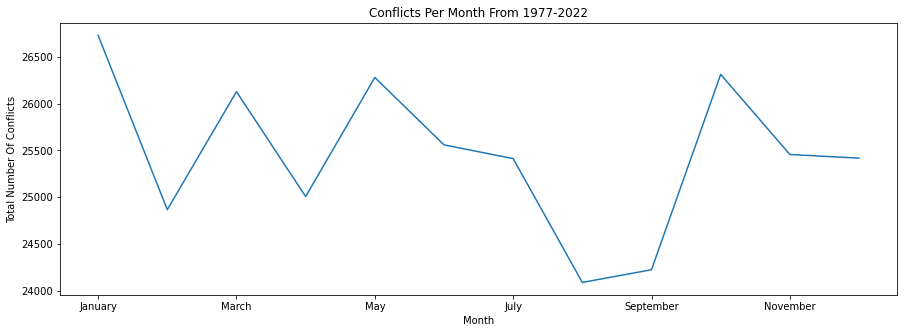

In [54]:
#Pot the frequency of conflicts per month
plt.figure(figsize=(15, 5))
cm.plot()
plt.title("Conflicts Per Month From 1977-2022")
plt.xlabel("Month")
plt.ylabel("Total Number Of Conflicts");

**Observations**
January, March and October have the highest number of conflicts
The number of conflicts tend to be less From June to August

In [70]:
cm1 = df.groupby(pd.Grouper(key="event_date",freq='M'))["data_id"].count()
cm1

event_date
1997-01-31     241
1997-02-28     143
1997-03-31     244
1997-04-30     202
1997-05-31     349
              ... 
2022-08-31    3036
2022-09-30    2865
2022-10-31    3183
2022-11-30    3106
2022-12-31    2839
Freq: M, Name: data_id, Length: 312, dtype: int64

**Observations**
The number of conflicts per month has been increasing over time, with some short-term fluctuations.
There is a seasonal variation in the number of conflicts
There is a regular pattern of higher conflict events in certain months of the year, such as March, June, and October, and lower conflict events in other months, such as January and December. This suggests that there may be certain factors, such as seasonal weather patterns or holidays, that influence the number of conflicts in a given month.

**Hypothesis**
H0 : There is no seasonal pattern in the frequency of conflict events
H1 : There is a seasonal pattern in the frequency of conflict events
Significance level : 0.05

In [ ]:
#Create a contingency table to calculate the frequency of conflicts in each season
season_freq = pd.crosstab(index=df["season"], columns='count')
season_freq

In [ ]:
season_freq.plot(kind="bar")
plt.ylabel("Number Of Conflicts")
plt.xlabel("Seasons")
plt.title("Conflict Frequency Per Season");


In [ ]:
from scipy.stats import chi2_contingency

# calculate the test statstsic and p-value
chi2_stat, p_val, dof, expected = chi2_contingency(season_freq)
if( p_val < 0.05):
    print("Reject the null hypothesis.There is signficant evidence of a seasonal pattern in the frequency of conflict events")
else :
    print("Fail to reject the null hypothesis.There is insignificant evidence to support that there is a seasonal pattern in the  frequency of conflict events")

### Are there any differences in the types of conflict events that occur during different seasons?

In [82]:
conflict_season = df[["season","event_type"]]
conflict_season

,season,event_type
0,summer,Battles
1,summer,Strategic developments
2,summer,Violence against civilians
3,summer,Battles
4,summer,Violence against civilians
...,...,...
305474,summer,Battles
305475,summer,Battles
305476,summer,Violence against civilians
305477,summer,Battles


In [84]:
sb.barplot(data=conflict_season,x="season");

TypeError: Horizontal orientation requires numeric `x` variable.